Работу выполнил: Шкуропат Павел
Группа: 5030102/10201

Теоретическая информация о DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это алгоритм кластеризации, который группирует вместе точки, находящиеся в плотных областях, и маркирует точки в областях низкой плотности как выбросы или шум. Основные характеристики DBSCAN включают:

Определение кластеров на основе плотности:

DBSCAN определяет кластеры как области с высокой плотностью точек, разделенные областями с низкой плотностью.
Точки, которые не принадлежат ни к одному кластеру, считаются шумом.
Параметры:

eps (ε): Максимальное расстояние между двумя точками, чтобы они считались частью одного кластера. Этот параметр определяет радиус вокруг каждой точки для поиска соседних точек.
min_samples: Минимальное количество точек, необходимое для формирования плотного кластера. Точка с таким количеством соседей в пределах eps считается ядром кластера.
Типы точек:

Core points (ядерные точки): Точки, у которых в пределах eps находится не менее min_samples соседних точек.
Border points (граничные точки): Точки, которые не являются ядерными, но находятся в пределах eps от ядерной точки.
Noise points (шумовые точки): Точки, которые не являются ни ядерными, ни граничными.
Преимущества:

DBSCAN может находить кластеры произвольной формы.
Не требует заранее заданного числа кластеров.
Устойчив к выбросам и шуму.
Недостатки:

Требует подбора параметров eps и min_samples, что может быть сложной задачей.
Не всегда хорошо работает с данными различной плотности.

<Axes: >

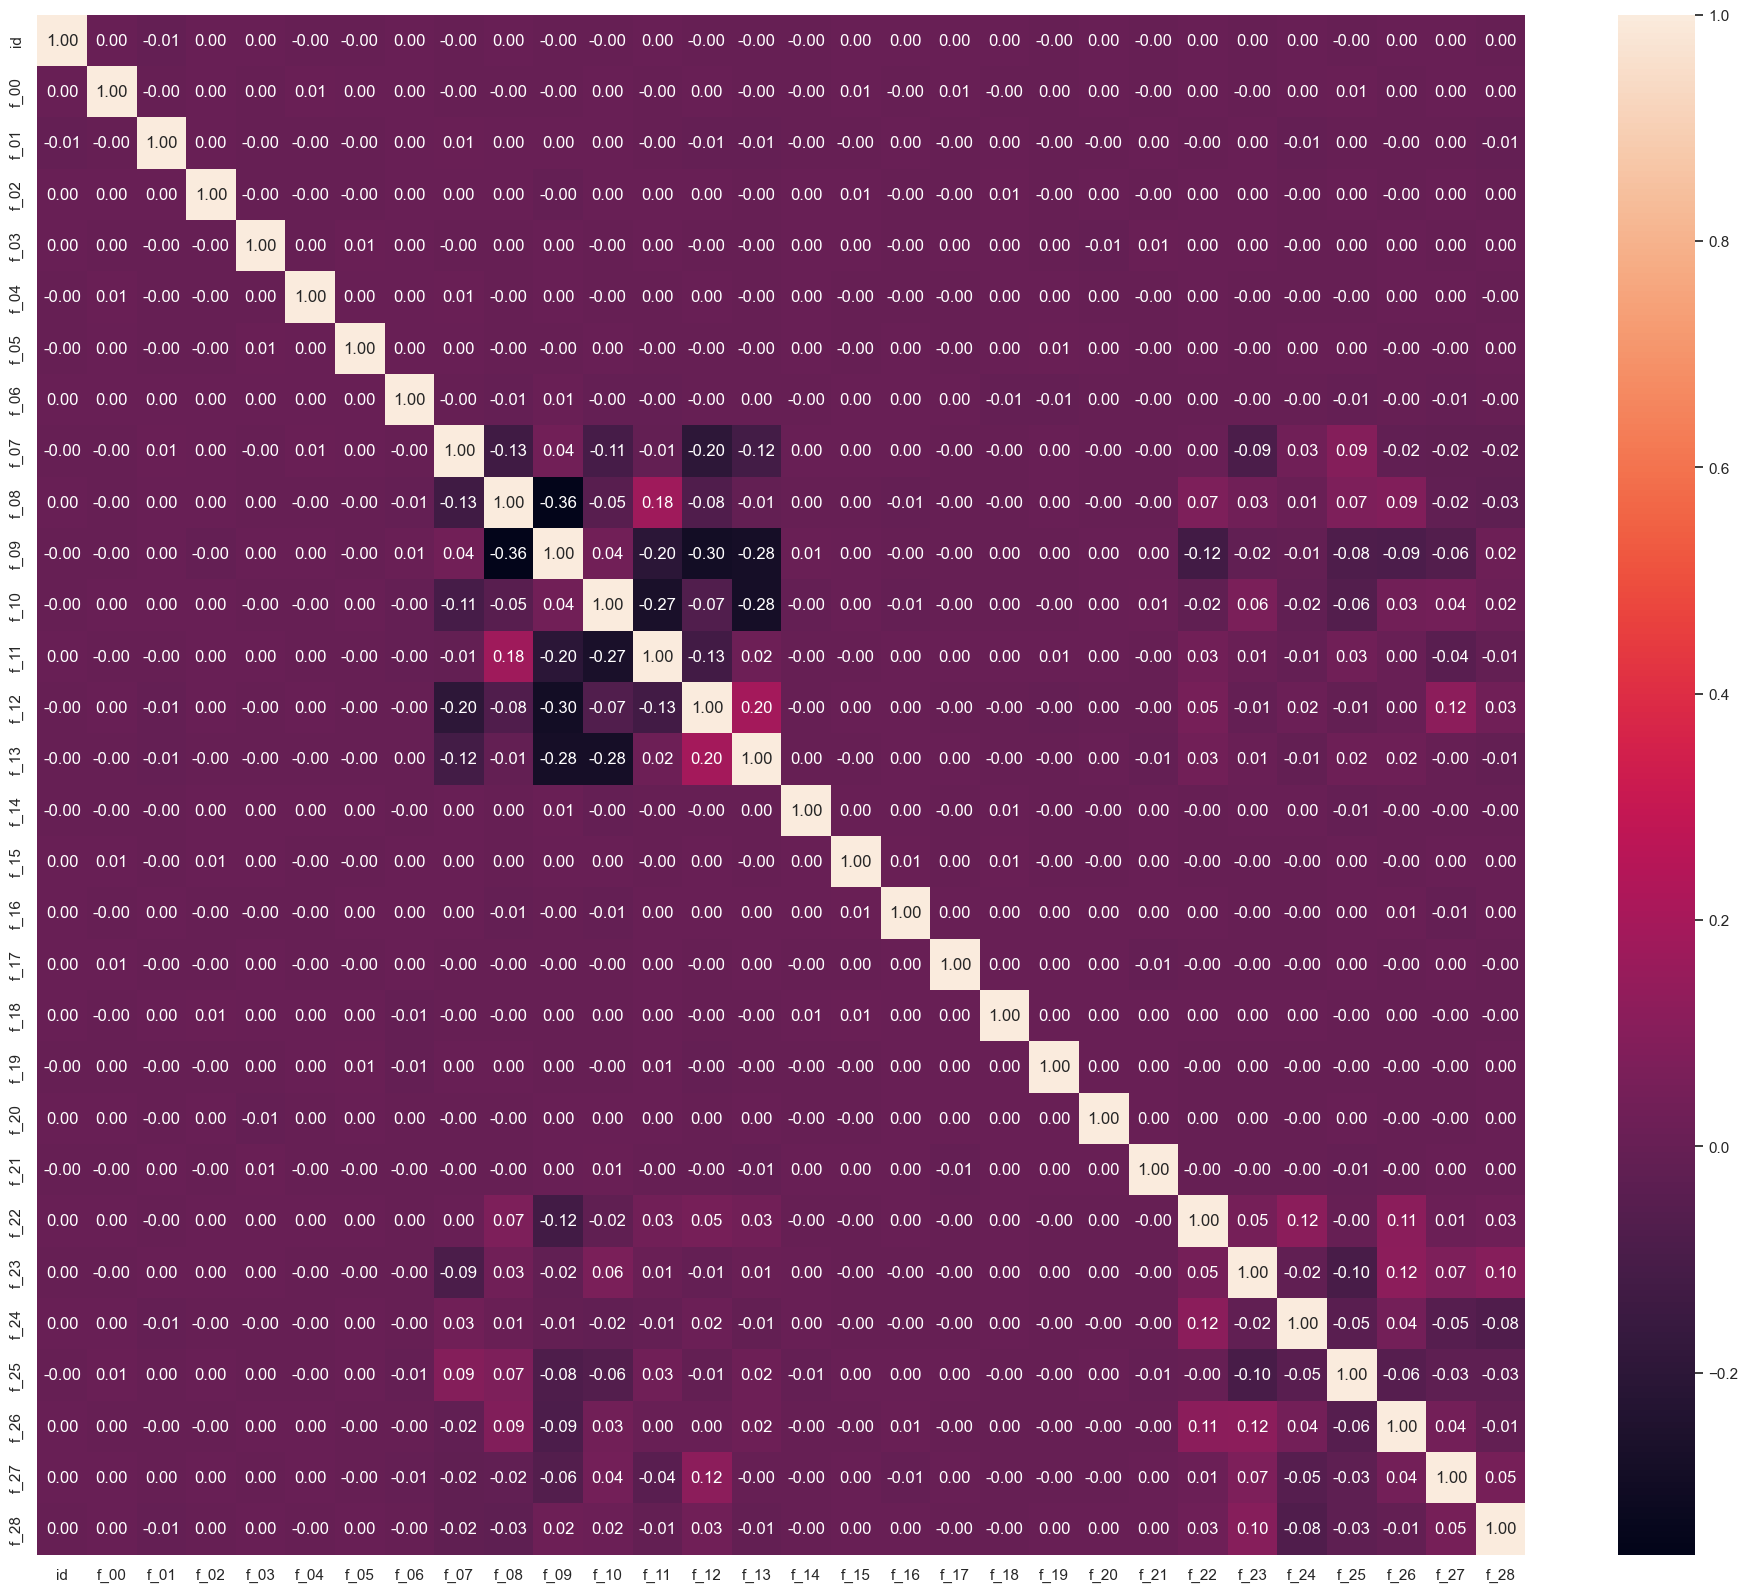

In [1]:
# Загрузка данных:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

sns.set(rc={'figure.figsize':(24,20)})
sns.heatmap(df.corr(),annot=True,fmt='.2f')

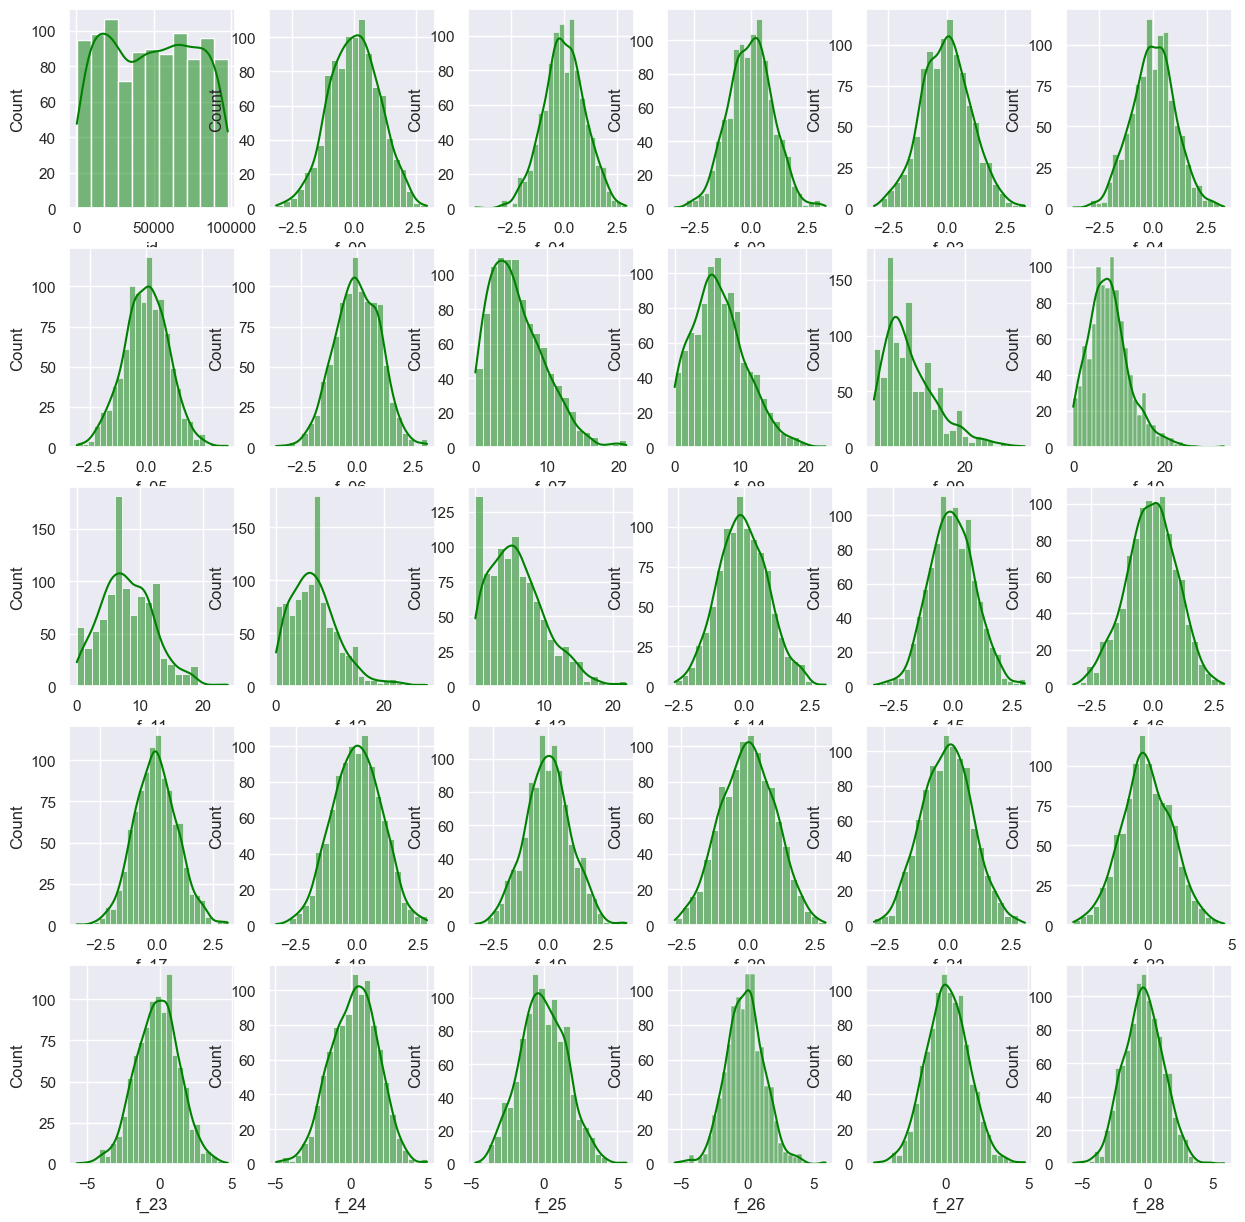

In [3]:
sns.set(rc={'figure.figsize':(15,15)})
for i, column in enumerate(list(df.columns), 1):
    plt.subplot(5,6,i)
    p=sns.histplot(x=column,data=df.sample(1000),stat='count',kde=True,color='green')

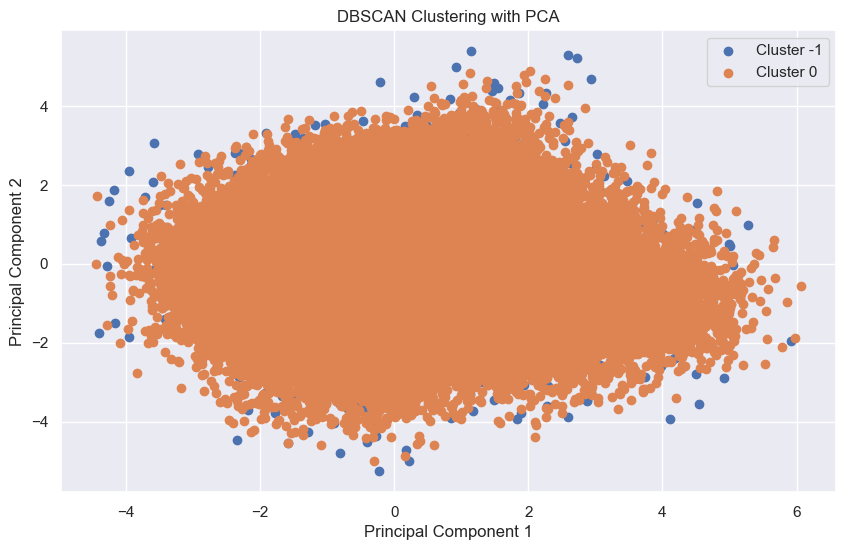

Number of clusters: 2


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('data.csv')

# Предварительная обработка данных
# Заполнение пропущенных значений средним значением
df.fillna(df.mean(), inplace=True)

# Проверка наличия категориальных признаков
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
if not categorical_cols.empty:
    df = pd.get_dummies(df, columns=categorical_cols)

# Нормализация данных
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Настройка параметров DBSCAN на основе анализа
eps = 5.0  # Примерное значение на основе графика k-дистанции
min_samples = 10  # Примерное значение

# Настройка и запуск DBSCAN
dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_model.fit(df_scaled)
labels = dbscan_model.labels_

# Функция для визуализации кластеров
def plot_clusters(data, labels):
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)
    unique_labels = np.unique(labels)
    plt.figure(figsize=(10, 6))
    for label in unique_labels:
        index = np.where(labels == label)
        plt.scatter(data_pca[index, 0], data_pca[index, 1], label=f'Cluster {label}')
    plt.title('DBSCAN Clustering with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Визуализация кластеров
plot_clusters(df_scaled, labels)
print(f'Number of clusters: {len(np.unique(labels))}')


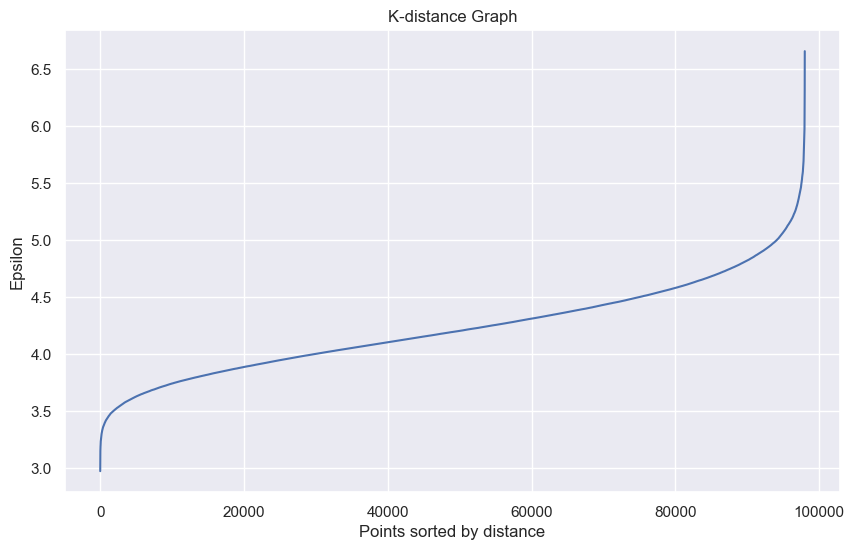

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Вычисление k-дистанции
neigh = NearestNeighbors(n_neighbors=4)  # min_samples - 1
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)

# Сортировка расстояний
distances = np.sort(distances, axis=0)
distances = distances[:, 3]  # min_samples - 1

# Построение графика k-дистанции
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()


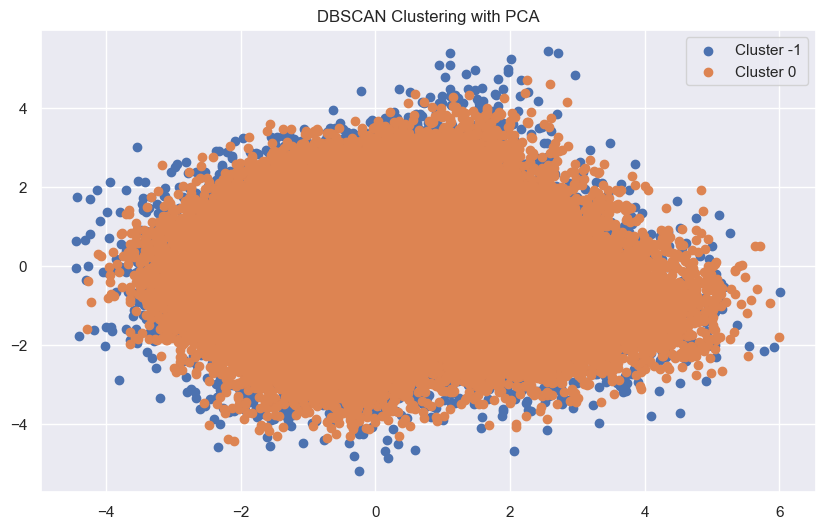

eps: 4.5, min_samples: 5, Number of clusters: 2


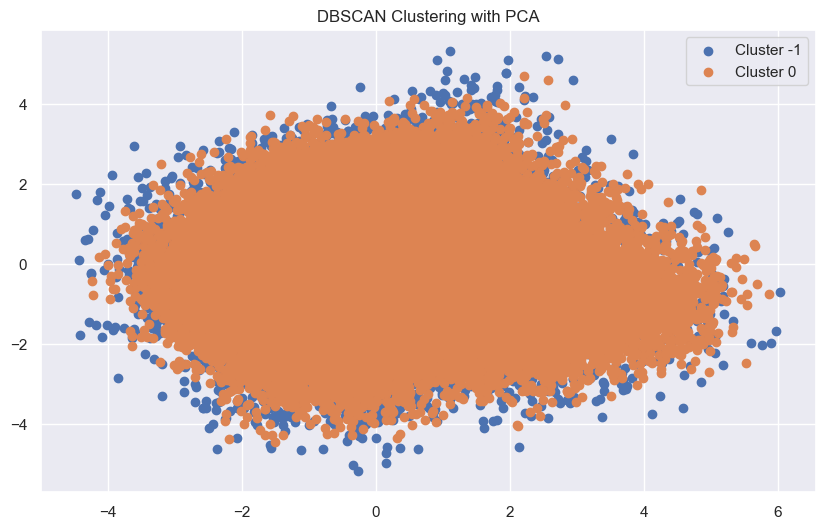

eps: 4.5, min_samples: 10, Number of clusters: 2


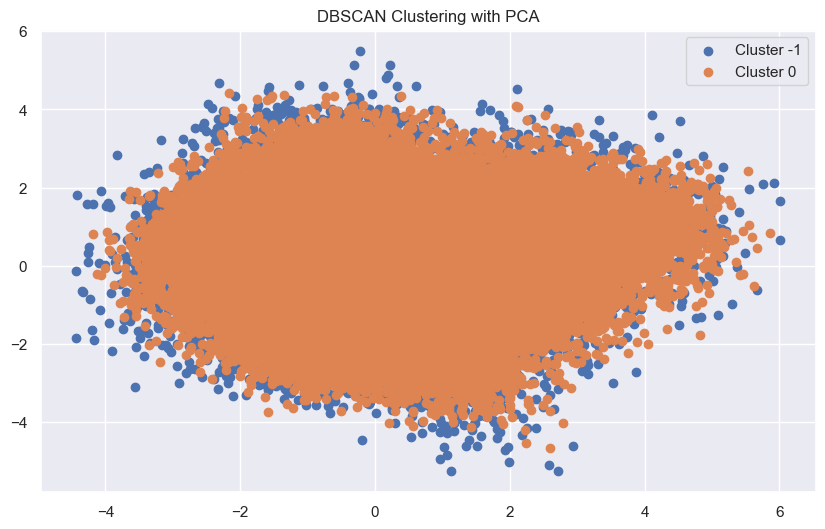

eps: 4.5, min_samples: 15, Number of clusters: 2


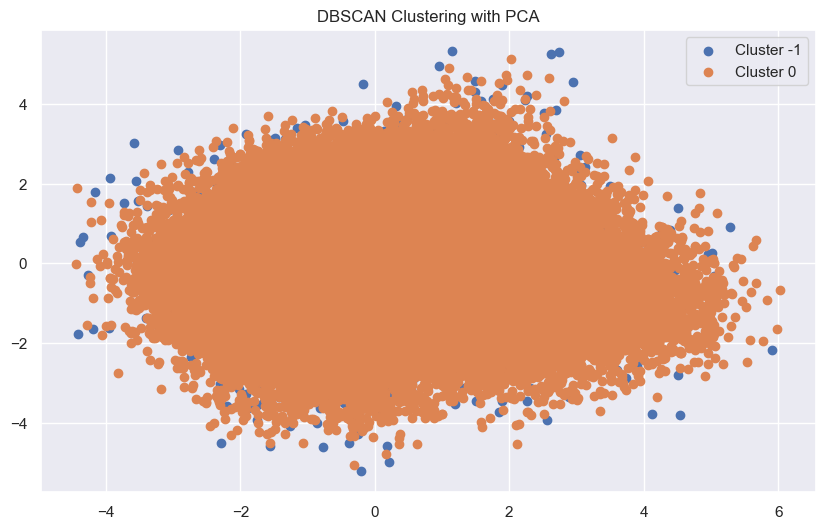

eps: 5.0, min_samples: 5, Number of clusters: 2


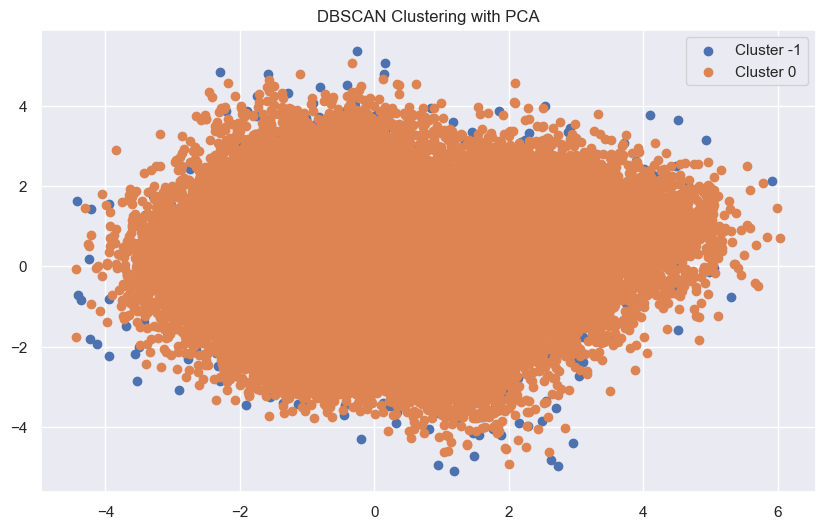

eps: 5.0, min_samples: 10, Number of clusters: 2


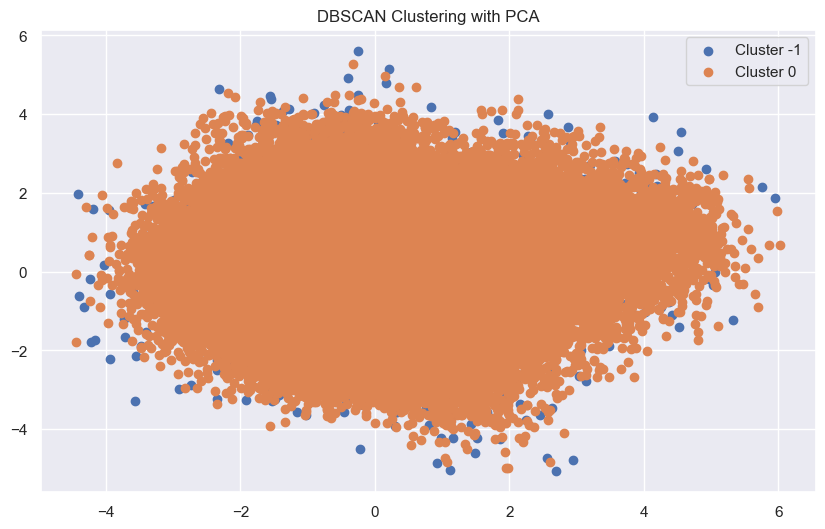

eps: 5.0, min_samples: 15, Number of clusters: 2


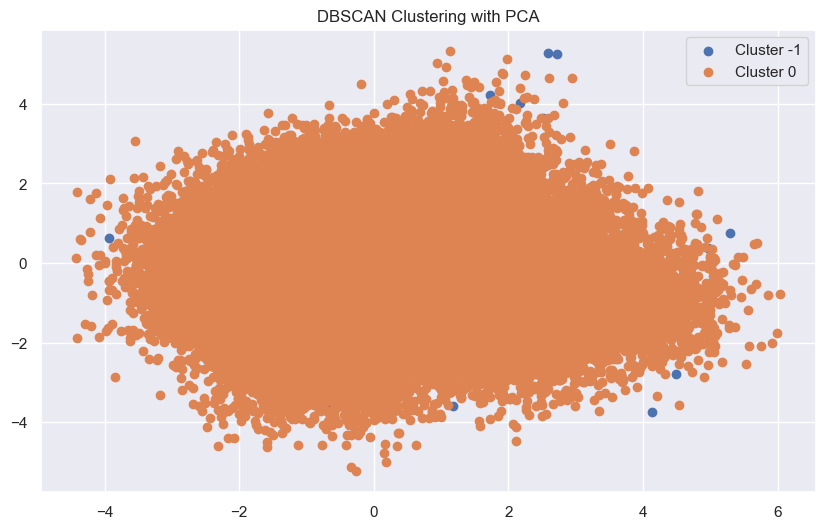

eps: 5.5, min_samples: 5, Number of clusters: 2


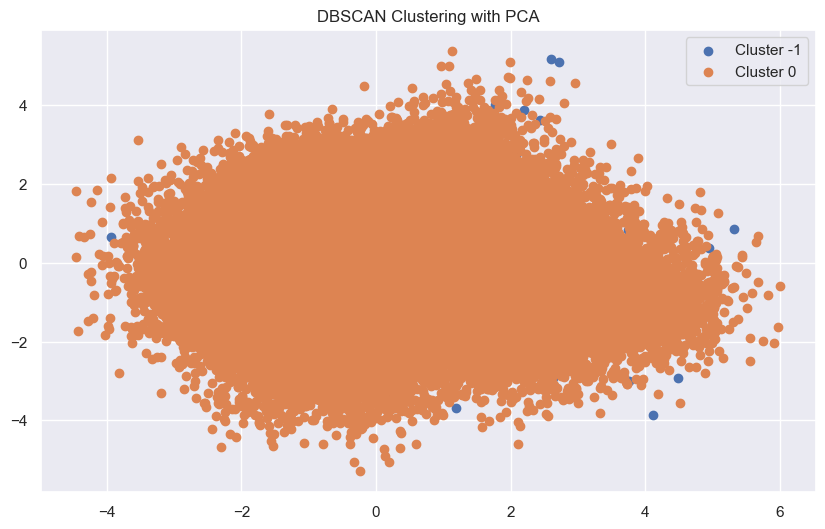

eps: 5.5, min_samples: 10, Number of clusters: 2


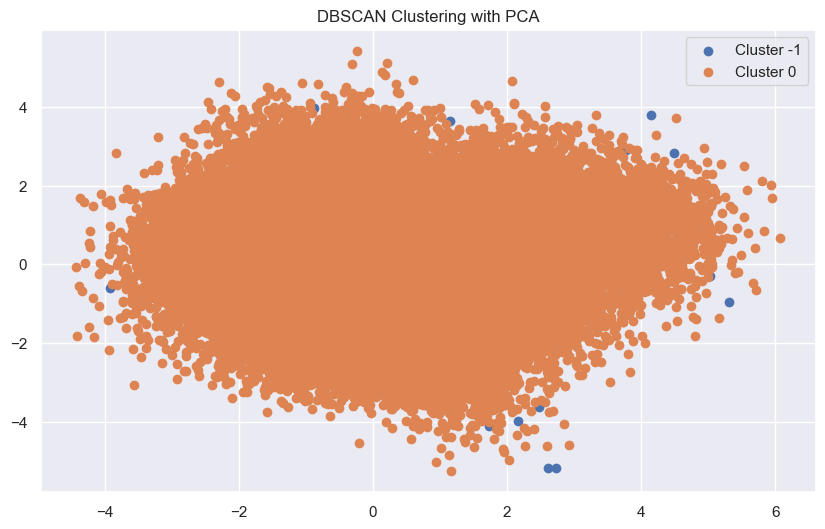

eps: 5.5, min_samples: 15, Number of clusters: 2


In [7]:
# Функция для визуализации кластеров
def plot_clusters(data, labels):
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)
    unique_labels = np.unique(labels)
    plt.figure(figsize=(10, 6))
    for label in unique_labels:
        index = np.where(labels == label)
        plt.scatter(data_pca[index, 0], data_pca[index, 1], label=f'Cluster {label}')
    plt.title('DBSCAN Clustering with PCA')
    plt.legend()
    plt.show()

# Пример эмпирического подбора параметров
eps_values = [4.5, 5.0, 5.5]  # Значения вокруг точки излома
min_samples_values = [5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_model.fit(df_scaled)
        labels = dbscan_model.labels_
        plot_clusters(df_scaled, labels)
        print(f'eps: {eps}, min_samples: {min_samples}, Number of clusters: {len(np.unique(labels))}')
